In [23]:
#Import packages
import numpy as np
import pandas as pd
from lmfit import Model, Parameters
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
import matplotlib.font_manager
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.weight": "bold",
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"]})

In [24]:
#import data, load data into arrays and define axes 

FA   = pd.read_csv("Readings/CSV/Frequency-Amplitude.csv") 
FP   = pd.read_csv("Readings/CSV/Frequency-PhaseShift.csv")
LFA  = pd.read_csv("Readings/CSV/LockIn-Frequency-Amplitude.csv")
LFP  = pd.read_csv("Readings/CSV/LockIn-Frequency-PhaseShift.csv")

FA   = np.array(FA) 
FP   = np.array(FP)
LFA  = np.array(LFA)
LFP  = np.array(LFP)

fa_frequency   = FA[:,2]
fa_amplitude   = FA[:,1]
fp_frequency   = FP[:,2]
fp_phaseshift  = FP[:,1]
lfa_frequency  = LFA[:,2]
lfa_amplitude  = LFA[:,1]
lfp_frequency  = LFP[:,2]
lfp_phaseshift = LFP[:,1]


In [25]:
# Define functions

def Filter(freq,R,C):
    omega = 2*np.pi*freq
    vout=( 1./(1j*R*omega*C+1.))
    return(vout)

In [31]:
#Define constants in our circuit

C = 0.022e-6 # 0.022 microFarads
R = 1.5e6 # 1.5 megaOhms

In [27]:
f = np.linspace(10,10000,1000)
vout_c = Filter(f,R,C)
F_cut = 1./(2.*np.pi*R*C)
print("Filter cut off frequency is: {:7.2f} Hz".format(F_cut))

Filter cut off frequency is:    4.82 Hz


In [30]:
# Create a fitting model

fit = Model(Filter)
params = Parameters()


(10.0, 40.0)

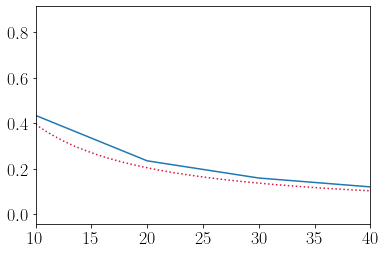

In [28]:
plt.plot(f,np.abs(vout_c))
plt.plot(lfa_frequency,lfa_amplitude, c="crimson", ls='dotted')
plt.xlim(10,40)

